In [ ]:
# comparing data files

In [63]:
library(ggplot2)
library(viridis)
library(dplyr)

In [13]:
df1 = read.delim('human_primate_msr.csv', sep = ',')
df1$mis_h = df1$obs_mis_h/df1$exp_mis_h
df1$mis_p = df1$obs_mis_p/df1$exp_mis_p
df1$syn_h = df1$obs_syn_h/df1$exp_syn_h
df1$syn_p = df1$obs_syn_p/df1$exp_syn_p
df1[1:2,]
dim(df1)

genename exp_syn_h obs_syn_h exp_mis_h obs_mis_h exp_syn_p obs_syn_p
1 PCBP2     93.53608 104       215.2894  63        213.1768  109      
2 ABHD17C  194.12188 121       316.9103  83        326.4661  261      
  exp_mis_p obs_mis_p s_primate   s_human    p.adj.popgen MSR_deviation
1 499.4342   47       0.001813357 0.01766947 3.71e-09     -0.5504539   
2 589.2608  102       0.002173075 0.01031407 9.27e-06     -0.4107464   
  p.adj.MSR low_quality mis_h     mis_p      syn_h     syn_p    
1 0.000090  FALSE       0.2926294 0.09410648 1.1118704 0.5113128
2 0.000234  FALSE       0.2619038 0.17309823 0.6233197 0.7994705

[1] 18895    19

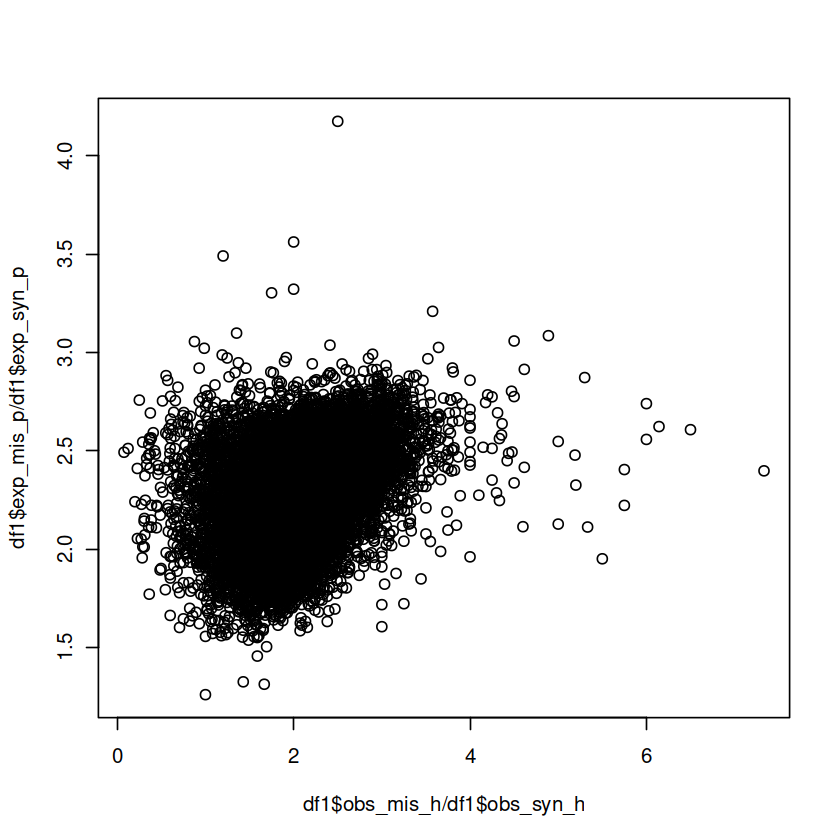

In [14]:
plot(df1$obs_mis_h/df1$obs_syn_h, df1$exp_mis_p/df1$exp_syn_p)
# plot(df1$mis_h/df1$syn_h, df1$mis_p/df1$syn_p)

In [15]:
 # expressolog, bulk?
bulkspec = read.delim('~/Primate_MTG/bulk_coexp_spec_cross_species_25.csv', sep = ',')
dim(bulkspec)
bulkspec[1,]

[1] 14131   301

gene human_chimp human_rhesusm human_crabm human_mouse human_rat human_rabbit
1 A1BG 0.9171331   0.6754909     0.519668    0.3459922   0.432844  0.5321471   
  human_boar human_cow human_dog ⋯ bombyx_yeast bombyx_arabidopsis bombyx_maize
1 0.8450163  0.1639923 0.9315495 ⋯ NA           NA                 NA          
  bombyx_tomato yeast_arabidopsis yeast_maize yeast_tomato arabidopsis_maize
1 NA            NA                NA          NA           NA               
  arabidopsis_tomato maize_tomato
1 NA                 NA

In [24]:
bulkspec$human_score = rowMeans(bulkspec[,2:15], na.rm = T)
bulkspec$nhp_score = rowMeans(bulkspec[,c(2:4, 26:38, 50:60, 71:81)], na.rm = T)
ids = match(df1$genename, bulkspec$gene)

In [149]:
df2 = data.frame(gene = df1$genename, 
                 human_MSR = df1$obs_mis_h/df1$obs_syn_h, nhp_MSR = df1$exp_mis_p/df1$exp_syn_p,
                 human_ratio = df1$mis_h/df1$syn_h, nhp_ratio = df1$mis_p/df1$syn_p,
                 human_mis = df1$mis_h, human_syn = df1$syn_h,
                 nhp_mis = df1$mis_p, nhp_syn = df1$syn_p,
                human_bulk_score = bulkspec$human_score[ids], nhp_bulk_score = bulkspec$nhp_score[ids])
df2[1:2,]

gene    human_MSR nhp_MSR  human_ratio nhp_ratio human_mis human_syn
1 PCBP2   0.6057692 2.342817 0.2631866   0.1840488 0.2926294 1.1118704
2 ABHD17C 0.6859504 1.804968 0.4201757   0.2165161 0.2619038 0.6233197
  nhp_mis    nhp_syn   human_bulk_score nhp_bulk_score
1 0.09410648 0.5113128 0.9872347        0.9820228     
2 0.17309823 0.7994705 0.8878293        0.8676613

Warning message:
“Removed 2708 rows containing missing values or values outside the scale range
(`geom_point()`).”


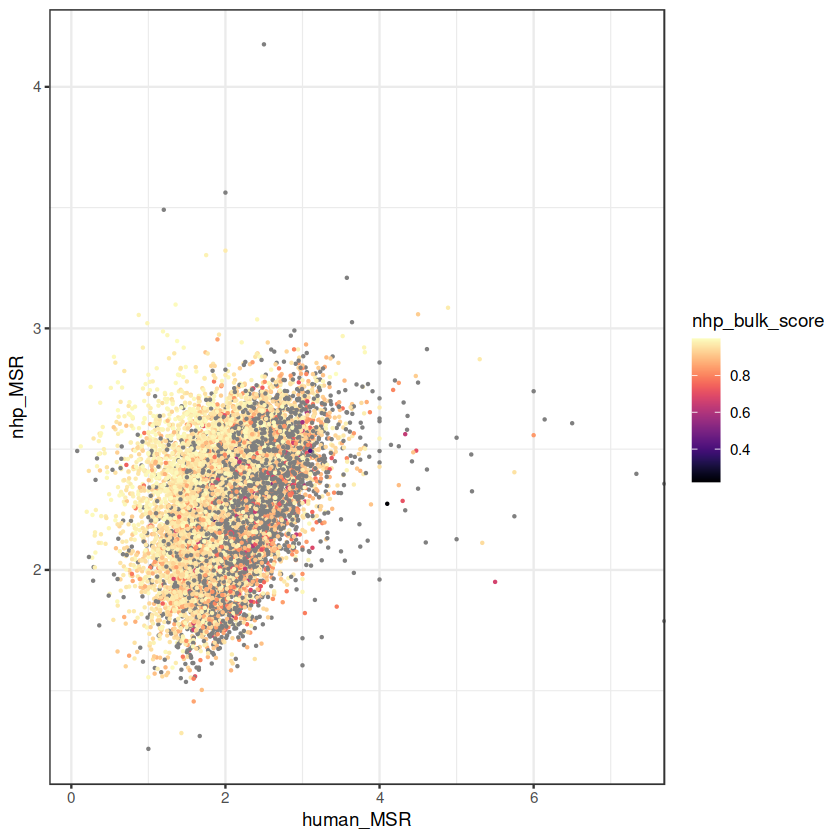

In [37]:
ggplot(df2, aes(x = human_MSR, y = nhp_MSR, color = nhp_bulk_score)) + geom_point(size = 0.2) + 
scale_color_viridis(option = 'A') + theme_bw()

Warning message:
“Removed 990 rows containing missing values or values outside the scale range (`geom_point()`).”


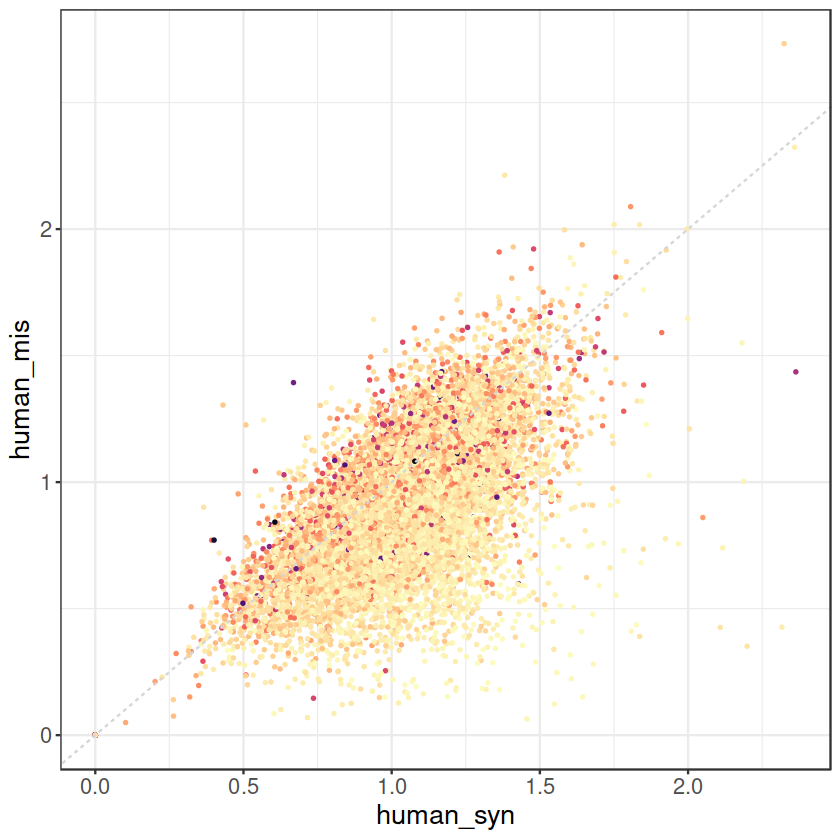

In [60]:
# png('aa-human-mis-syn.png', width = 4, height = 4, res = 300, units = 'in')
ggplot(df2[!is.na(df2$human_bulk_score),], aes(x = human_syn, y = human_mis, color = human_bulk_score)) + 
geom_point(size = 0.5) + scale_color_viridis(option = 'A') + theme_bw() +
geom_abline(slope = 1, intercept = 0, color = '#d6d6d6', linetype = 'dashed') +
theme(text = element_text(size = 16), legend.position = 'none')
# dev.off()

Warning message:
“Removed 985 rows containing missing values or values outside the scale range (`geom_point()`).”


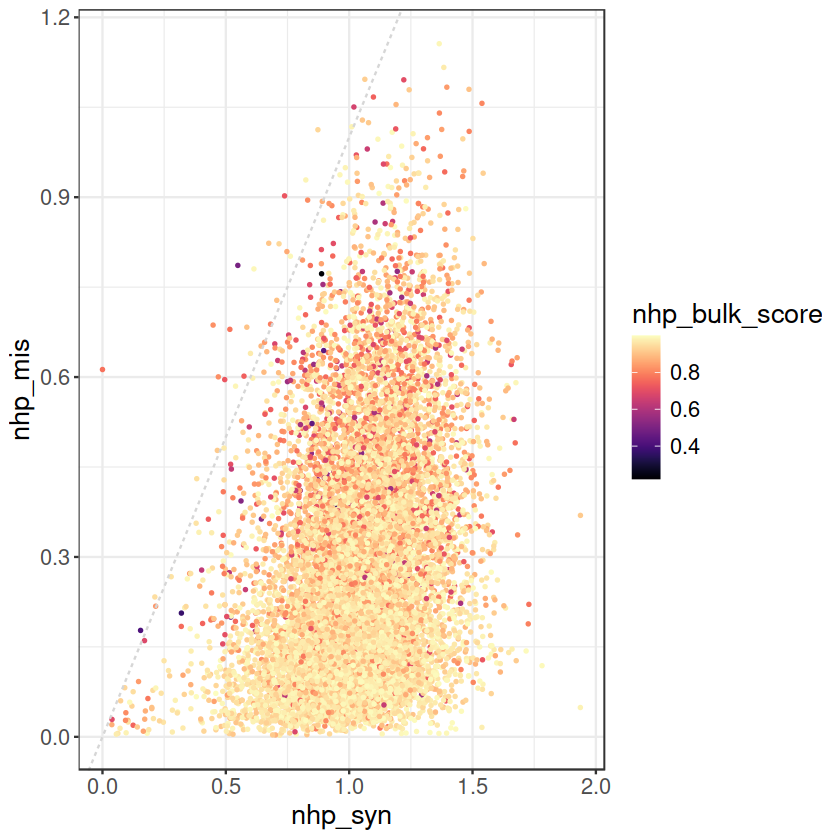

In [57]:
ggplot(df2[!is.na(df2$nhp_bulk_score),], aes(x = nhp_syn, y = nhp_mis, color = nhp_bulk_score)) + 
geom_point(size = 0.5) + scale_color_viridis(option = 'A') + theme_bw() +
geom_abline(slope = 1, intercept = 0, color = '#d6d6d6', linetype = 'dashed') +
theme(text = element_text(size = 16))

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 6053 rows containing non-finite outside the scale range (`stat_smooth()`).”
Warning message:
“Removed 6053 rows containing missing values or values outside the scale range
(`geom_point()`).”


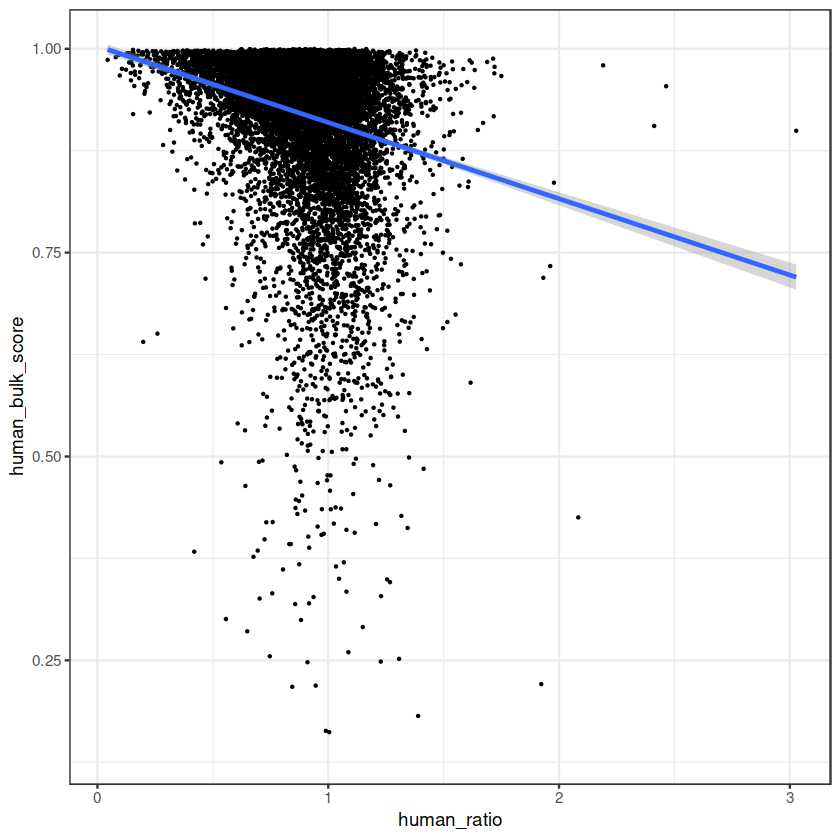

In [41]:
ggplot(df2, aes(x = human_ratio, y = human_bulk_score)) + geom_point(size = 0.2) + geom_smooth(method = 'lm') +
theme_bw()

In [71]:
df3 = read.delim('DataFileS1_cross_species_var.csv', sep = ',')
df3 <- df3[df3$Clinvar.Significance!='',]
dim(df3)
df3[1:2,]

[1] 1178   17

species chr  position refnuc refcodon refAA altnuc altcodon altAA
813  Bonobo  chr1 23111545 G      GTT      V     A      ATT      I    
1305 Bonobo  chr1 36932503 C      GGA      G     T      AGA      R    
     strand_human strand_species nucpos_in_codon tri_nucleotide UCSC_ID   
813  +            +              1               CGT            uc001bge.3
1305 -            -              1               CGG            uc001cax.2
     AApos proteinLength Clinvar.Significance
813  263   988           benign              
1305 683   864           benign

In [72]:
df3 %>% group_by(species, Clinvar.Significance) %>% reframe(count = n())

species    Clinvar.Significance count
1  Bonobo     benign                85  
2  Bonobo     pathogenic             7  
3  Chicken    benign                 9  
4  Chicken    pathogenic             8  
5  Chimpanzee benign               218  
6  Chimpanzee pathogenic            21  
7  Cow        benign                77  
8  Cow        pathogenic            39  
9  Goat       benign                60  
10 Goat       pathogenic            16  
11 Gorilla    benign               167  
12 Gorilla    pathogenic            23  
13 Marmoset   benign                25  
14 Marmoset   pathogenic             7  
15 Mouse      benign                30  
16 Mouse      pathogenic             4  
17 Orangutan  benign               160  
18 Orangutan  pathogenic            12  
19 Pig        benign                74  
20 Pig        pathogenic            30  
21 Rhesus     benign                87  
22 Rhesus     pathogenic            11  
23 Zebrafish  benign                 2  
24 Zebrafish  pathogenic             6

In [138]:
get_closest_gene <- function(tab2, spe){
    tab1 = read.delim(paste0(spe, '_coord.txt'), sep = '\t')
    tab2$closest_gene = NA
    
    for(ii in 1:dim(tab2)[1]){
        pos = tab2$position[ii]
        ids = which(paste0('chr', tab1[,3])==tab2$chr[ii])
        dists = pos - tab1[ids,4]
        dists <- dists[dists>0]
        if(length(dists)){
            tab2$closest_gene[ii] = tab1[which.min(dists),1]
        }
    }
    tab2 <- tab2[,c(1,17,18)]
    tab2 <- tab2[!duplicated(temp2),]
        
    om = read.delim(paste0('/data/suresh/spetree/scoresNM/human_', spe, '_odb_ensembl_agg_pairwise_LCA.csv'),
                    sep = ',')
    if(spe %in% c('pig', 'cow')){
        tab2$sc = om$sc[match(tab2$closest_gene, om$sp1_gene)]
    }else{
        tab2$sc = om$sc[match(tab2$closest_gene, om$sp2_gene)]
    }
    
    return(tab2)
}

In [139]:
temp1 = get_closest_gene(df3[df3$species=='Mouse',], 'mouse')
temp2 = get_closest_gene(df3[df3$species=='Chimpanzee',], 'chimp')
temp3 = get_closest_gene(df3[df3$species=='Pig',], 'pig')
temp4 = get_closest_gene(df3[df3$species=='Rhesus',], 'rhesusm')
temp5 = get_closest_gene(df3[df3$species=='Cow',], 'cow')

In [144]:
temp = rbind(temp2, temp4, temp3, temp5)
temp$species = factor(temp$species, levels = c('Chimpanzee', 'Rhesus', 'Pig', 'Cow'))
temp[1,]

species    Clinvar.Significance closest_gene       sc
53521 Chimpanzee benign               ENSPTRG00000052035 NA

Warning message:
“Removed 15 rows containing non-finite outside the scale range (`stat_boxplot()`).”


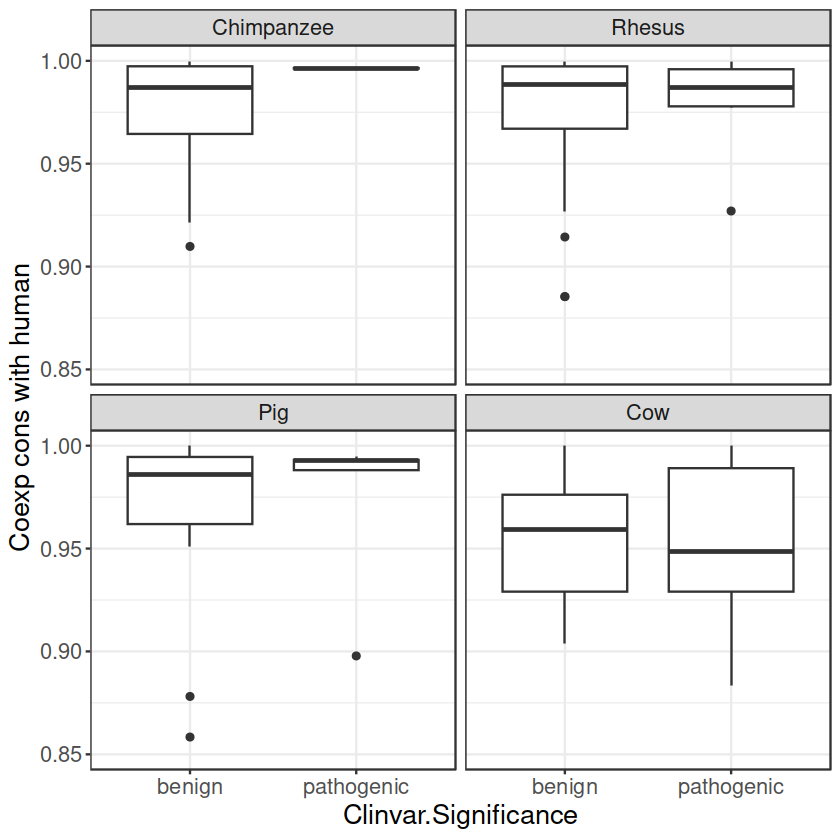

In [146]:
# png('aa-chimp-splits.png', width = 7, height = 4, res = 300, units = 'in')
ggplot(na.omit(temp), aes(x = Clinvar.Significance, y = sc)) + geom_boxplot() + theme_bw() +
ylim(0.85, 1) + theme(text = element_text(size = 16)) + facet_wrap(~species) +
ylab('Coexp cons with human')
# dev.off()

In [147]:
tab1 = read.delim('lof_het_mutations_cases.csv', sep = ',')
tab2 = read.delim('denovo_mutations_cases.csv', sep = ',')
tab1 <- tab1[,c('Cardiac.Category', 'EM', 'NDD', 'CHR', 'POS', 'Gene', 'ExonicFunc.refGene', 'pLI.Score')]
tab2 <- tab2[,c('Cardiac.Category', 'EM', 'NDD', 'CHROM', 'POS', 'Gene', 'Variant_Class', 'pLI.score')]
cols1 = c('Cardiac.Category', 'EM', 'NDD', 'chr', 'pos', 'Gene', 'Variant_Class', 'pLI')
colnames(tab1) = cols1
colnames(tab2) = cols1
tab1$mutation = 'LoF_het'
tab2$mutation = 'denovo'
tab3 = rbind(tab1, tab2)
tab3$Cardiac.Category[(tab3$Cardiac.Category) %in% c('CTD (TGA)', ' CTD (TGA)')] = 'CTD_TGA'
tab3$Cardiac.Category[(tab3$Cardiac.Category) %in% c('other (AVC)', 'Other (AVC)')] = 'AVC'
tab3$Cardiac.Category[(tab3$Cardiac.Category) %in% c('OTHER', 'Other', 'other')] = 'other'
tab3[1,]

Cardiac.Category EM NDD chr pos      Gene   Variant_Class        pLI 
1 other            No Yes 12  58152532 MARCH9 frameshift_insertion 0.35
  mutation
1 LoF_het

In [151]:
df2$NDD = tab3$NDD[match(df2$gene, tab3$Gene)]
df2$CHD = !is.na(match(df2$gene, tab3$Gene))
df2[1:2,]

gene    human_MSR nhp_MSR  human_ratio nhp_ratio human_mis human_syn
1 PCBP2   0.6057692 2.342817 0.2631866   0.1840488 0.2926294 1.1118704
2 ABHD17C 0.6859504 1.804968 0.4201757   0.2165161 0.2619038 0.6233197
  nhp_mis    nhp_syn   human_bulk_score nhp_bulk_score NDD CHD  
1 0.09410648 0.5113128 0.9872347        0.9820228      Yes  TRUE
2 0.17309823 0.7994705 0.8878293        0.8676613      NA  FALSE

In [159]:
png('aa-nhp-chd-splits.png', width = 7, height = 4, res = 300, units = 'in')
ggplot(df2, aes(CHD, nhp_mis)) + geom_boxplot() + theme_bw() + theme(text = element_text(size = 16))
dev.off()

Warning message:
“Removed 2561 rows containing non-finite outside the scale range (`stat_boxplot()`).”


png 
  2

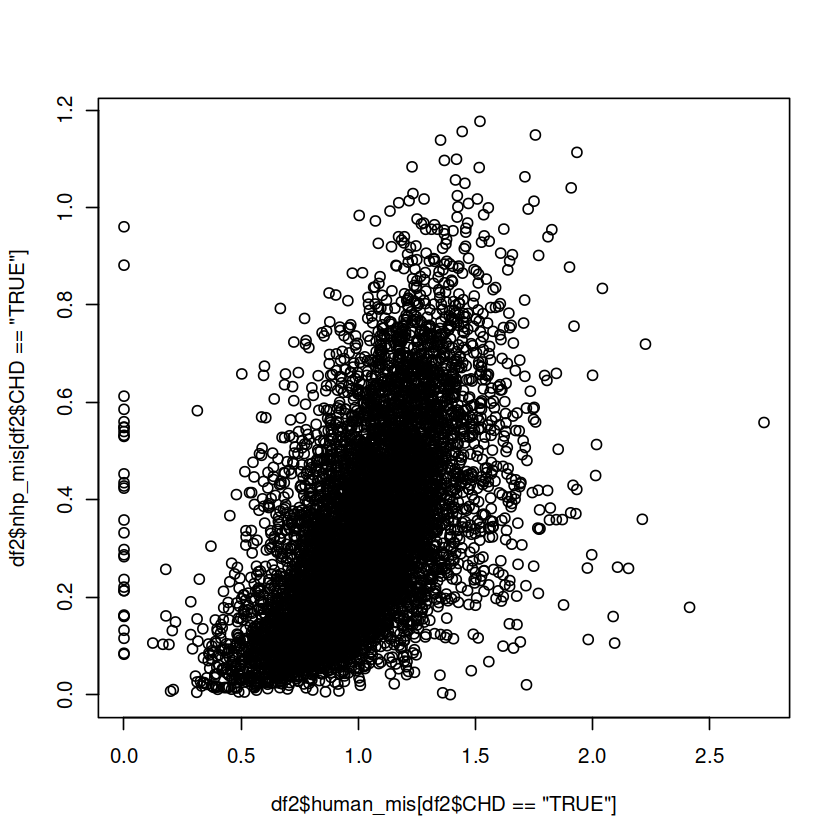

In [160]:
plot(df2$human_mis[df2$CHD=='TRUE'], df2$nhp_mis[df2$CHD=='TRUE'])